### Question 2

Suppose that 120 cars arrive at a freeway onramp per hour on average. Simulate one hour of arrivals to the
freeway onramp: (1) subdivide the hour into small time intervals (< 1 second) and then (2) perform a Bernoulli
trial to indicate a car arrival within each small time‐interval. Generate a histogram for the number of arrivals
per hour. Repeat the counting experiment by sampling directly from an equivalent Poisson distribution by
using the inverse transform method (described in class). Generate a histogram for the number of arrivals per
hour using this method. Overlay the theoretical p.m.f. on both histograms. Comment on the results.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
import math

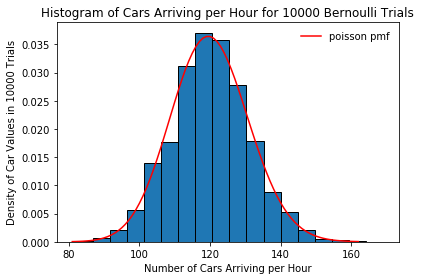

The mean of the poisson pmf:  120.0
The variance of the poisson pmf:  120.0
The mean of the Bernoulli trials:  120.0069
The variance of the Bernoulli trials:  121.22265239000059


<Figure size 432x288 with 0 Axes>

In [29]:
sub_intervals = 60 * 60 * 20 # intervals of .05 seconds
lmbda = 120
p = lmbda/sub_intervals;
bernoulli_samples = []
for i in range(0,10000): # 10000 Bernoulli Trials
    u = np.random.rand(sub_intervals,1);
    bernoulliTrials = u<p
    x = np.sum(bernoulliTrials); # This is a sample of Poisson(120), 1 Bernoulli Trial
    bernoulli_samples.append(x)

num_bins = 18
fig, ax = plt.subplots()
# the histogram of the data
n, bins, patches = ax.hist(bernoulli_samples, num_bins, edgecolor = 'black', density = True)


# adding the poisson pmf line
mean, var, skew, kurt = poisson.stats(lmbda, moments='mvsk')
x = np.arange(poisson.ppf(0.0001, lmbda), poisson.ppf(0.9999, lmbda))
ax.plot(x, poisson.pmf(x, lmbda), ms=8, label='poisson pmf', color = 'red')
ax.legend(loc='best', frameon=False)


plt.xlabel("Number of Cars Arriving per Hour")
plt.ylabel("Density of Car Values in 10000 Trials")
plt.title("Histogram of Cars Arriving per Hour for 10000 Bernoulli Trials")
fig.tight_layout()
plt.show()
print("The mean of the poisson pmf: ", str(mean))
print("The variance of the poisson pmf: ", str(var))
bernoulli_mean = sum(bernoulli_samples)/len(bernoulli_samples)
bernoulli_variance = sum((i - bernoulli_mean) ** 2 for i in bernoulli_samples) / len(bernoulli_samples)

print("The mean of the Bernoulli trials: ", str(bernoulli_mean))
print("The variance of the Bernoulli trials: ", str(bernoulli_variance))
plt.savefig("Project3_Q2_1.png")

- Now, in this section below the counting experiment is repeated by sampling directly from an equivalent Poisson distribution by using the inverse transform method 

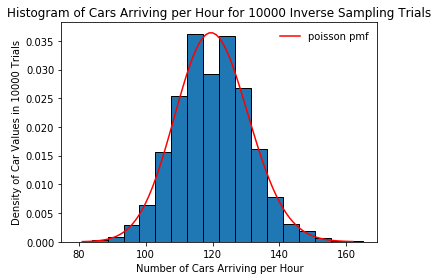

The mean of the poisson pmf:  120.0
The variance of the poisson pmf:  120.0
The mean of the Inverse Sampling trials:  119.9942
The variance of the Inverse Sampling trials:  118.46716636000026


<Figure size 432x288 with 0 Axes>

In [28]:
lmbda = 120
inverse_samples = []

for i in range(0,10000): # 10000 inverse transform simulations
    j = 0
    p = math.exp(-1 *lmbda)
    inverse_sum = p
    uniform = np.random.uniform(0,1)
    
    while uniform > inverse_sum:
        p = p * lmbda / (j+1)
        inverse_sum += p
        j +=1
    inverse_samples.append(j)
#print(inverse_samples)
    
num_bins = 18
fig, ax = plt.subplots()
# the histogram of the data
n, bins, patches = ax.hist(inverse_samples, num_bins, edgecolor = 'black', density = True)


# adding the poisson pmf line
mean, var, skew, kurt = poisson.stats(lmbda, moments='mvsk')
x = np.arange(poisson.ppf(0.0001, lmbda), poisson.ppf(0.9999, lmbda))
ax.plot(x, poisson.pmf(x, lmbda), ms=8, label='poisson pmf', color = 'red')
ax.legend(loc='best', frameon=False)


plt.xlabel("Number of Cars Arriving per Hour")
plt.ylabel("Density of Car Values in 10000 Trials")
plt.title("Histogram of Cars Arriving per Hour for 10000 Inverse Sampling Trials")
fig.tight_layout()
plt.show()
print("The mean of the poisson pmf: ", str(mean))
print("The variance of the poisson pmf: ", str(var))
inverse_mean = sum(inverse_samples)/len(inverse_samples)
inverse_variance = sum((i - inverse_mean) ** 2 for i in inverse_samples) / len(inverse_samples)

print("The mean of the Inverse Sampling trials: ", str(inverse_mean))
print("The variance of the Inverse Sampling trials: ", str(inverse_variance))
plt.savefig("Project3_Q2_2.png")

#### Q2 Analysis

- The first histogram is that of the number of cars arriving per hour using 10000 Bernoulli trials.
    - Intervals of 0.05 seconds were used, and to be able to fit both the poisson pmf and the Bernoulli Trials on the same histograms, the density had to be used in order for there to be proper scaling.
- The second histogram is that of the number of cars arriving per hour, but using 10000 Inverse Sampling trials. 
    - To be able to fit both the poisson pmf and the Inverse Scaling on the same histograms, the density had to be used in order for there to be proper scaling.
- The means and variances of each type of experiment used are listed above, and both methods generate means and variances that are incredibly close to the poisson mean and variance, which is equal to lambda (in this case lambda = 120).